In [1]:
# 수입품목 22분류로 나누어 100개의 항목중 6개만 추출! 

# 설정

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
# 수업 시작전 설정
%matplotlib inline
%config InlineBackend.figure_format='retina'
#한글 설정
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False) # y축
# 경고 메세지 안 보이게 
import warnings
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')

## 데이터불러오기

In [3]:
data=pd.read_excel('data/중국 수입물품 액수.xls',header=2)

In [4]:
data=data.dropna(axis=0)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   指标      120 non-null    object 
 1   2019年   120 non-null    float64
 2   2018年   120 non-null    float64
 3   2017年   120 non-null    float64
 4   2016年   120 non-null    float64
 5   2015年   120 non-null    float64
 6   2014年   120 non-null    float64
 7   2013年   120 non-null    float64
 8   2012年   120 non-null    float64
 9   2011年   120 non-null    float64
dtypes: float64(9), object(1)
memory usage: 10.3+ KB


## 데이터 정렬 및 확인

In [6]:
data=data.T
data.reset_index(inplace=True)
data.rename(columns=data.iloc[0],inplace=True)
data.drop(data.index[0],inplace=True)
data.iloc[:,1:len(data.columns)]=data.iloc[:,1:len(data.columns)].multiply(11.28).apply(np.ceil)
data.loc[0]=data.columns
pd.set_option('display.max_row', 30)
pd.set_option('display.max_columns', 121)

In [7]:
data

,指标,进口额(百万美元),第一类活动物；动物产品进口额(百万美元),01章活动物进口额(百万美元),02章肉及食用杂碎进口额(百万美元),03章鱼、甲壳动物、软体动物及其他水生无脊椎动物进口额(百万美元),04章乳品；蛋品；天然蜂蜜；其他食用动物产品进口额(百万美元),05章其他动物产品进口额(百万美元),第二类植物产品进口额(百万美元),06章活树及其他活植物；鳞茎、根及类似品；插花及装饰用簇叶进口额(百万美元),07章食用蔬菜、根及块茎进口额(百万美元),08章食用水果及坚果；甜瓜或柑桔属水果的果皮进口额(百万美元),09章咖啡、茶、马黛茶及调味香料进口额(百万美元),10章谷物进口额(百万美元),11章制粉工业产品；麦芽；淀粉；菊粉；面筋进口额(百万美元),12章含油子仁及果实；杂项子仁及果实；工业用或药用植物；稻草、秸秆及饲料进口额(百万美元),13章虫胶；树胶、树脂及其他植物液、汁进口额(百万美元),14章编结用植物材料；其他植物产品进口额(百万美元),第三类动、植物油、脂及其分解产品；精制的食用油脂；动、植物蜡进口额(百万美元),15章动、植物油、脂及其分解产品；精制的食用油脂；动、植物蜡进口额(百万美元),第四类食品；饮料、酒及醋；烟草、烟草及烟草代用品的制品进口额(百万美元),16章肉、鱼、甲壳动物、软体动物及其他水生无脊椎动物的制品进口额(百万美元),17章糖及糖食进口额(百万美元),18章可可及可可制品进口额(百万美元),19章谷物、粮食粉、淀粉或乳的制品；糕饼点心进口额(百万美元),20章蔬菜、水果、坚果或植物其他部分的制品进口额(百万美元),21章杂项食品进口额(百万美元),22章饮料、酒及醋进口额(百万美元),23章食品工业的残渣及废料；配制的动物饲料进口额(百万美元),24章烟草、烟草及烟草代用品的制品进口额(百万美元),第五类矿产品进口额(百万美元),25章盐；硫磺；泥土及石料；石膏料、石灰及水泥进口额(百万美元),26章矿砂、矿渣及矿灰进口额(百万美元),27章矿物燃料、矿物油及其蒸馏产品；沥青物质；矿物蜡进口额(百万美元),第六类化学工业及其相关工业的产品进口额(百万美元),28章无机化学品；贵金属、稀土金属、放射性元素及其同位素的有机及无机化合物进口额(百万美元),29章有机化学品进口额(百万美元),30章药品进口额(百万美元),31章肥料进口额(百万美元),32章鞣料浸膏及染料浸膏；鞣酸及其衍生物；染料，颜料及其他着色料；油漆及清漆；油灰及其他类似胶粘剂；墨水、油墨进口额(百万美元),33章精油及香膏；芳香料制品及化妆盥洗品进口额(百万美元),34章肥皂、有机表面活性剂、洗涤剂、润滑剂、人造蜡、调制蜡、光洁剂、蜡烛及类似品、塑型用膏、“牙科用蜡”及牙科用熟石膏制剂进口额(百万美元),35章蛋白类物质；改性淀粉；胶；酶进口额(百万美元),36章炸药；烟火制品；火柴；引火合金；易燃材料制品进口额(百万美元),37章照相及电影用品进口额(百万美元),38章杂项化学产品进口额(百万美元),第七类塑料及其制品；橡胶及其制品进口额(百万美元),39章塑料及其制品进口额(百万美元),40章橡胶及其制品进口额(百万美元),第八类生皮、皮革、毛皮及其制品；鞍具及挽具；旅行用品、手提包及类似品；动物肠线(蚕胶丝除外)制品进口额(百万美元),41章生皮(毛皮除外)及皮革进口额(百万美元),42章皮革制品；鞍具及挽具；旅行用品、手提包及类似容器；动物肠线(蚕胶丝除外)制品进口额(百万美元),43章毛皮、人造毛皮及其制品进口额(百万美元),第九类木及木制品；木炭；软木及软木制品；稻草、秸秆、针茅或其他编结材料制品；篮筐及柳条编结品进口额(百万美元),44章木及木制品；木炭进口额(百万美元),45章软木及软木制品进口额(百万美元),46章稻草、秸秆、针茅或其他编结材料制品；篮筐及柳条编结品进口额(百万美元),第十类木浆及其他纤维状纤维素浆；纸及纸板的废碎品；纸、纸板及其制品进口额(百万美元),47章木浆及其他纤维状纤维素浆；纸及纸板的废碎品进口额(百万美元),48章纸及纸板；纸浆，纸或纸板制品进口额(百万美元),49章书籍、报纸、印刷图画及其他印刷品；手稿、打字稿及设计图纸进口额(百万美元),第十一类纺织原料及纺织制品进口额(百万美元),50章蚕丝进口额(百万美元),51章羊毛、动物细毛或粗毛；马毛纱线及其机织物进口额(百万美元),52章棉花进口额(百万美元),53章其他植物纺织纤维；纸纱线及其机织物进口额(百万美元),54章化学纤维长丝进口额(百万美元),55章化学纤维短纤进口额(百万美元),56章絮胎、毡呢及无纺织物；特种纱线；线、绳、索、缆及其制品进口额(百万美元),57章地毯及纺织材料的其他铺地制品进口额(百万美元),58章特种机织物；簇绒织物；花边；装饰毯；装饰带；刺绣品进口额(百万美元),59章浸渍、涂布、包覆或层压的纺织物；工业用纺织制品进口额(百万美元),60章针织物及钩编织物进口额(百万美元),61章针织或钩编的服装及衣着附件进口额(百万美元),62章非针织或非钩编的服装及衣着附件进口额(百万美元),63章其他纺织制成品；成套物品；旧衣着及旧纺织品；碎织物进口额(百万美元),第十二类鞋、帽、伞、杖、鞭及其零件；已加工的羽毛及其制品；人造花；人发制品进口额(百万美元),64章鞋靴、护腿和类似品及其零件进口额(百万美元),65章帽类及其零件进口额(百万美元),66章雨伞、阳伞、手杖、鞭子、马鞭及其零件进口额(百万美元),67章已加工羽毛、羽绒及其制品；人造花；人发制品进口额(百万美元),第十三类石料、石膏、水泥、石棉、云母及类似材料的制品；陶瓷产品；玻璃及其制品进口额(百万美元),68章石料、石膏、水泥、石棉、云母及类似材料的制品进口额(百万美元),69章陶瓷产品进口额(百万美元),70章玻璃及其制品进口额(百万美元),第十四类天然或养殖珍珠、宝石或半宝石、贵金属、包贵金属及其制品；仿首饰；硬币进口额(百万美元),71章天然或养殖珍珠、宝石或半宝石、贵金属、包贵金属及其制品；仿首饰；硬币进口额(百万美元),第十五类贱金属及其制品进口额(百万美元),72章钢铁进口额(百万美元),73章钢铁制品进口额(百万美元),74章铜及其制品进口额(百万美元),75章镍及其制品进口额(百万美元),76章铝及其制品进口额(百万美元),78章铅及其制品进口额(百万美元),79章锌及其制品进口额(百万美元),80章锡及其制品进口额(百万美元),81章其他贱金属，金属陶瓷及其制品进口额(百万美元),82章贱金属工具、器具、利口器、餐匙、餐叉及其零件进口额(百万美元),83章贱金属杂项制品进口额(百万美元),第十六类机器、机械器具、电气设备及其零件；录音机及放声机、电视图像、声音的录制和重放设备及其零件、附件进口额(百万美元),84章核反应堆、锅炉、机械器具及零件进口额(百万美元),85章电机、电气设备及其零件；录音机及放声机、电视图像、声音的录制和重放设备及其零件、附件进口额(百万美元),第十七类车辆、航空器、船舶及有关运输设备进口额(百万美元),86章铁道及电车道机车、车辆及其零件；铁道及电车道轨道固定装置及其零件、附件；各种机械(包括电动机械)交通信号设备进口额(百万美元),87章车辆及其零件，附件，但铁道及电车道车辆除外进口额(百万美元),88章航空器，航天器及其零件进口额(百万美元),89章船舶及浮动结构体进口额(百万美元),第十八类光学、照相、电影、计量、检验、医疗或外科用仪器及设备、精密仪器及设备；钟表；乐器；上述物品的零件、附件进口额(百万美元),90章光学、照相、电影、计量、检验、医疗或外科用仪器及设备、精密仪器及设备；上述物品的零件、附件进口额(百万美元),91章钟表及其零件进口额(百万美元),92章乐器及其零件，附件进口额(百万美元),第十九类武器、弹药及其零件、附件进口额(百万美元),93章武器、弹药及其零件，附件进口额(百万美元),第二十类杂项制品进口额(百万美元),94章家具；寝具、褥垫、弹簧床垫、软坐垫及类似的填充制品；未列名灯具及照明装置；发光标志、发光名牌及类似品；活动房屋进口额(百万美元),95章玩具、游戏品、运动用品及其零件、附件进口额(百万美元),96章杂项制品进口额(百万美元),第二十一类艺术品、收藏品及古物进口额(百万美元),97章艺术品、收藏品及古物进口额(百万美元),第二十二类特殊交易品及未分类商品进口额(百万美元),98章特殊交易品及未分类商品进口额(百万美元)
1,2019年,23444454,473196,5615,212431,173874,71624,9654,693368,3046,17670,131582,10740,57020,14910,452129,4653,1622,112047,112047,303411,4448,18085,9152,81328,16873,41618,65621,44804,21486,5869575,91883,1860729,3916964,1747495,116933,648679,379069,39973,56727,181741,53595,41530,1279,30575,197399,980911,807578,173333,97760,41286,44965,11510,248625,247958,458,211,301075,214952,59469,26654,362950,639,36361,104087,11935,32361,25

## 필요한 항목만 추출

In [8]:
need_data=data.loc[:,['指标','19章谷物、粮食粉、淀粉或乳的制品；糕饼点心进口额(百万美元)','22章饮料、酒及醋进口额(百万美元)','30章药品进口额(百万美元)','33章精油及香膏；芳香料制品及化妆盥洗品进口额(百万美元)',
           '92章乐器及其零件，附件进口额(百万美元)','95章玩具、游戏品、运动用品及其零件、附件进口额(百万美元)']]

In [9]:
# 데이터 -> int변경
need_data.drop(0,inplace=True)
need_data=need_data.iloc[:,[0]].join(need_data.iloc[:,1:len(need_data.columns)].apply(pd.to_numeric))

In [10]:
need_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 1 to 9
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   指标                               9 non-null      object
 1   19章谷物、粮食粉、淀粉或乳的制品；糕饼点心进口额(百万美元)  9 non-null      int64 
 2   22章饮料、酒及醋进口额(百万美元)               9 non-null      int64 
 3   30章药品进口额(百万美元)                   9 non-null      int64 
 4   33章精油及香膏；芳香料制品及化妆盥洗品进口额(百万美元)    9 non-null      int64 
 5   92章乐器及其零件，附件进口额(百万美元)            9 non-null      int64 
 6   95章玩具、游戏品、运动用品及其零件、附件进口额(百万美元)   9 non-null      int64 
dtypes: int64(6), object(1)
memory usage: 896.0+ bytes


## 컬럼명 변경 ->한국어변역

In [11]:
need_data.columns=['年',
                   '19장 곡물(가루),전분 또는 유제품, 떡 수입액',
                   '22장 음료 및 술 수입액',
                   '30장 약품수입액',
                   '33장 오일,화장품,향수,세면용품',
                   '92장 음악악기',
                   '95 장 장난감,게임,스포츠용품,여과활동 액세사리등등']

## 인덱스변경

In [12]:
need_data=need_data.rename(index=need_data.iloc[:,0])  
need_data.drop(columns='年',inplace=True)

## 데이터 정렬

In [13]:
need_data.sort_values(by='19장 곡물(가루),전분 또는 유제품, 떡 수입액',inplace=True)

## 시각화

### 2019~2014년 수입6개 품목 

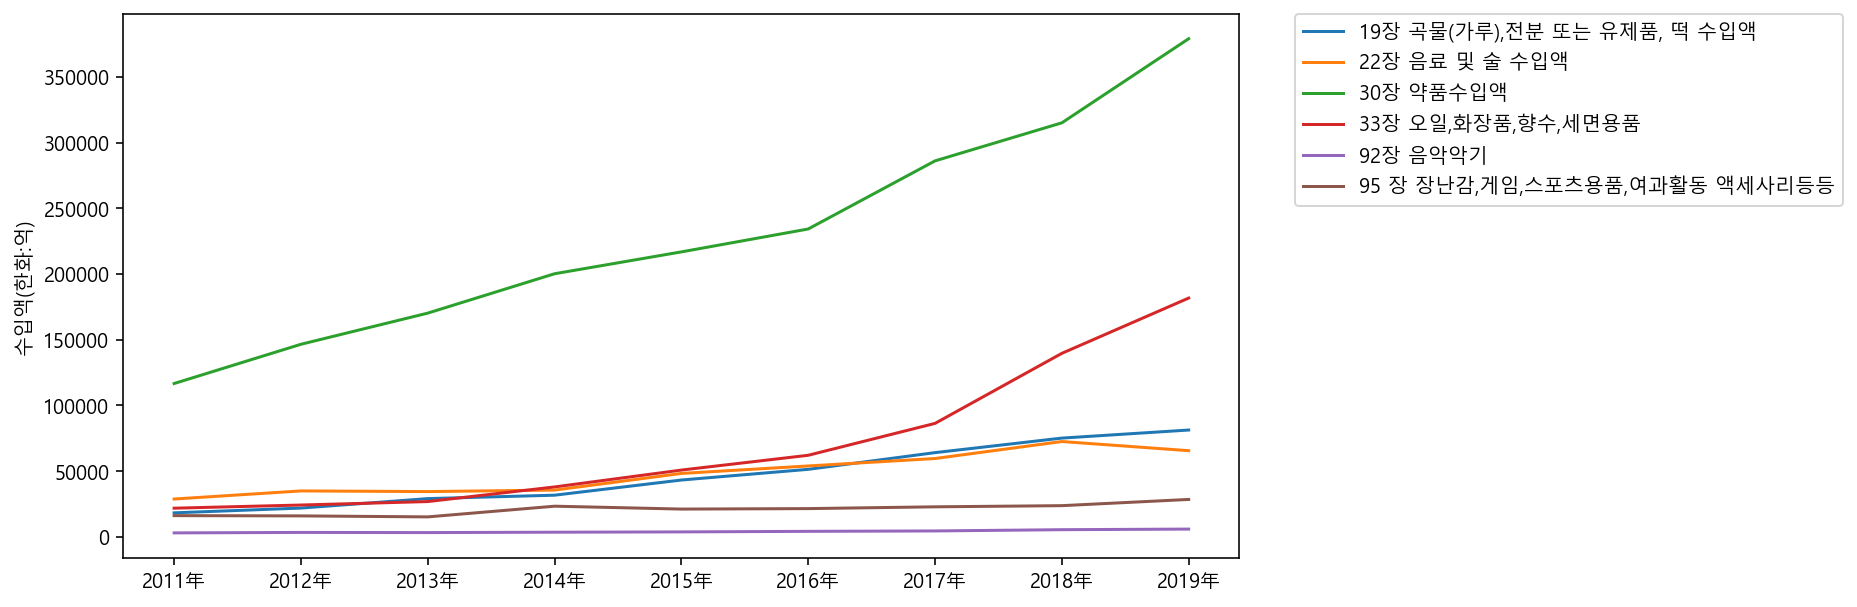

In [14]:
need_data.plot(figsize=(10,5),ylabel='수입액(한화:억)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### 2019년 수입품목 6가지만 출력 (단위 한화(억))

In [15]:
data_2019=need_data.loc[['2019年']].T.sort_values(by='2019年',ascending=False)
data_2019=data_2019.assign(name=data_2019.index)
data_2019.columns=['한화(억)','항목별']

0.0 4.6 5962.0 0.7999999999999998


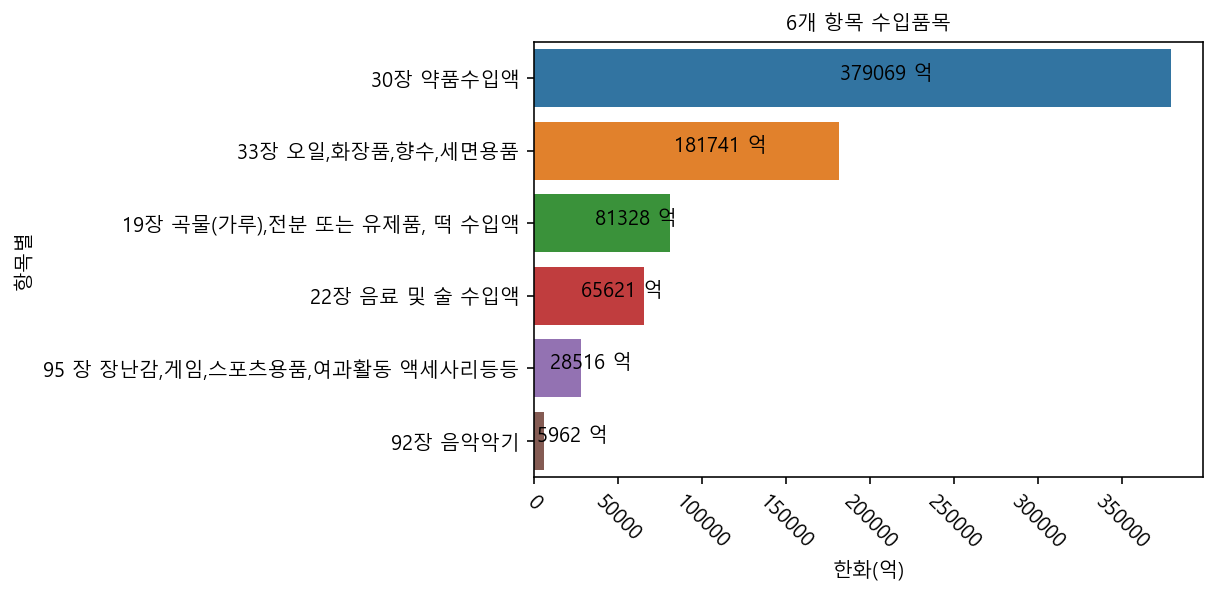

In [16]:
plt.xticks(rotation = - 45 )
ax=sns.barplot(x='한화(억)',y='항목별' , data=data_2019,ci=None)
plt.title('6개 항목 수입품목', fontsize=10)
x=[]
y=[]
for p in ax.patches:
        left, bottom, width, height = p.get_bbox().bounds
        #ax.annotate("%.f 명"%(height), (left+width/2, height*1.01), ha='center')
        ax.annotate("%.f 억"%(width),(left+width/2+20000, bottom+height/2),ha='center')
        x.append(width)
        y.append(height)
        

print(left,bottom,width,height)

# 중국_상품군별_온라인(직구)

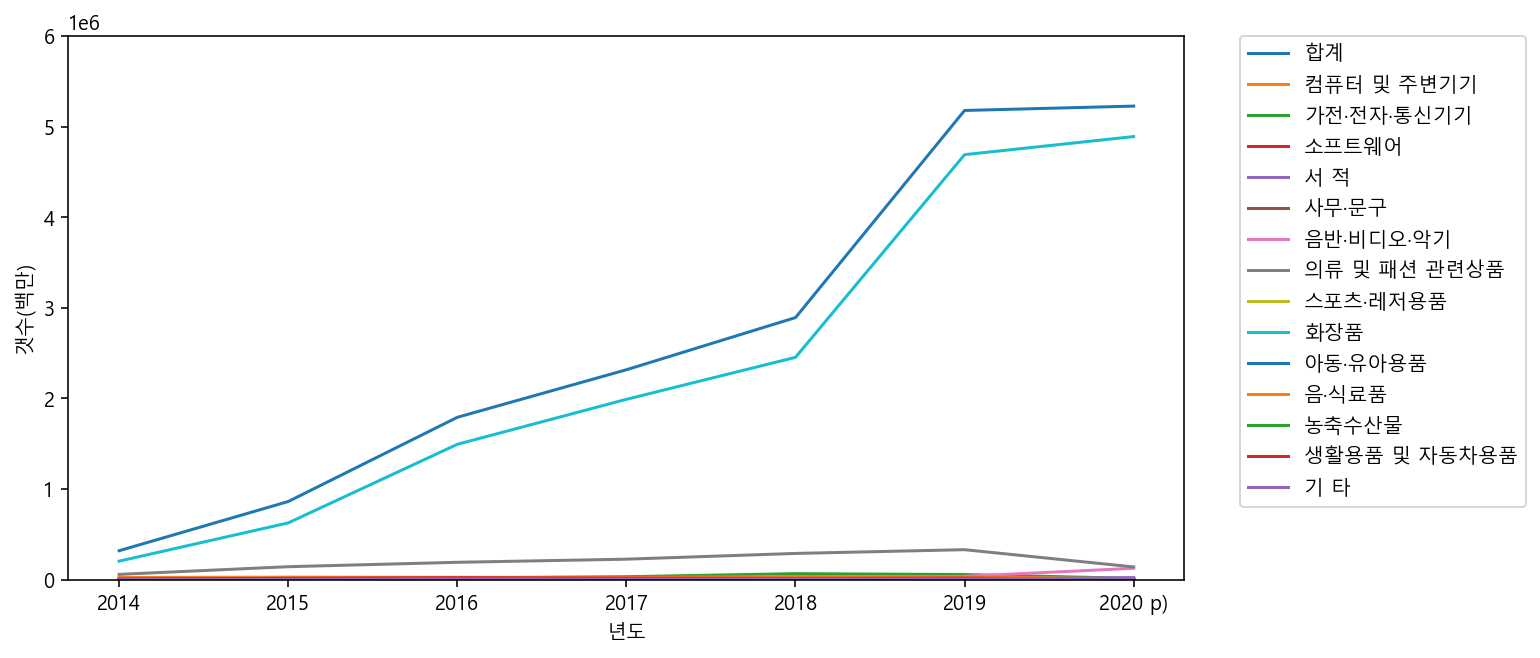

In [21]:
data=pd.read_excel('data/중국_상품군별_온라인쇼핑_해외직접판매액_20210404185255.xlsx',header=0)
data.drop(columns='Unnamed: 0',inplace=True)
data=data.loc[data['판매유형별']=='계']
data.index=data['상품군별']
data.drop(columns=['상품군별','판매유형별'],inplace=True)
data=data.T
data.plot(kind='line',figsize=(10,5),xlabel=('년도'),ylabel=('갯수(백만)'))
plt.ylim([0,6000000])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# 중국인 인구구성

[Text(0.5, 0, '年'), Text(0, 0.5, '인구수(단위:만)'), Text(0.5, 1.0, '총 중국노인인구수')]

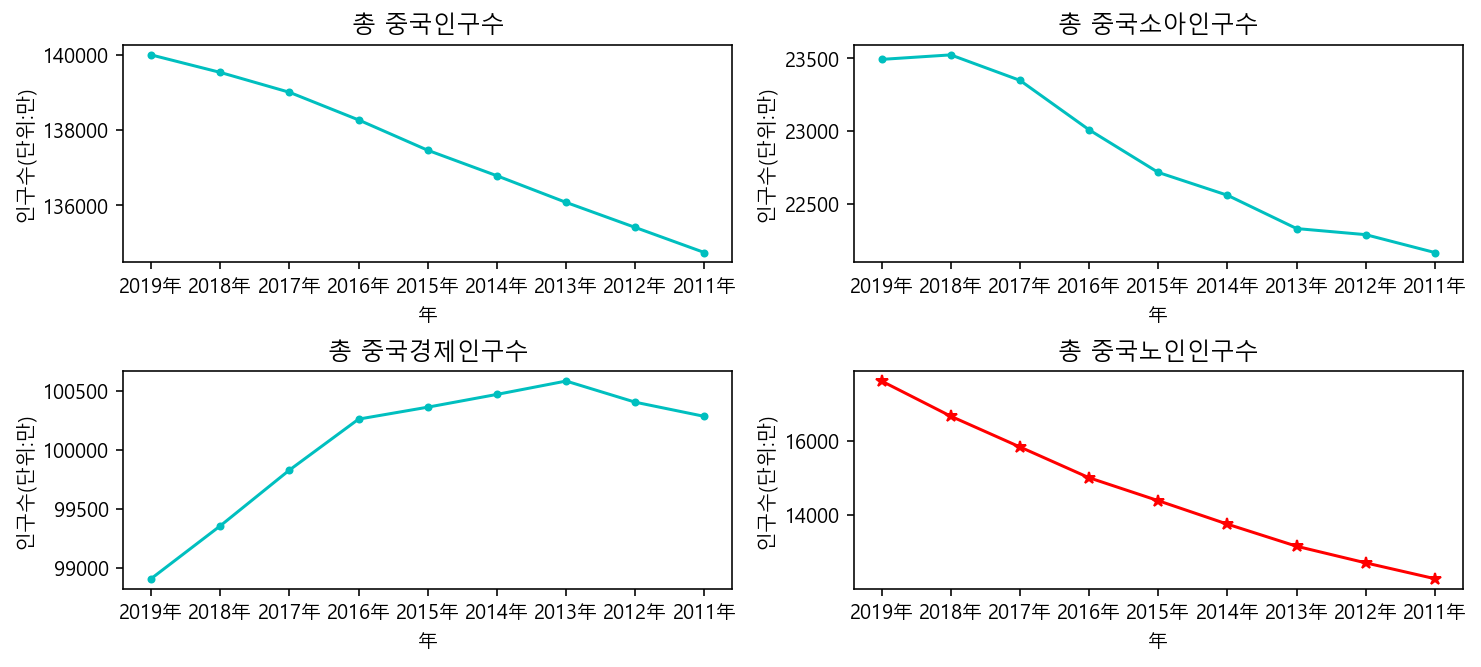

In [19]:
age_composition=pd.read_excel('data/2010~2019 중국연령구성비.xls',index_col=None)
age_composition.rename(columns={'指标':'연령대'},inplace=True)
age_composition=age_composition.T
age_composition=age_composition.rename(columns=age_composition.iloc[0])
age_composition=age_composition.drop(age_composition.index[0])
age_composition=age_composition.reset_index()
age_composition.columns=['년도','총인구수(总人口)','0-14岁','15-64岁','65岁及以上人口','총부양비율(总抚养比)','어린이부양비율(少儿抚养比)','노령부양비율(老年抚养比)']
age_data=age_composition.iloc[:,0:5]
year=list(age_data['년도'])
total_population=list(age_data['총인구수(总人口)'])
child=list(age_data['0-14岁'])
economic_population=list(age_data['15-64岁'])
older=list(age_data['65岁及以上人口'])
fig, axes = plt.subplots(2,2, figsize=(12,5))
plt.subplots_adjust(hspace=0.5, wspace=0.2)
axes[0,0].plot(year, total_population, 'c.-')
axes[0,0].set(xlabel='年', ylabel='인구수(단위:만)',title='총 중국인구수')

axes[0,1].plot(year,child,'c.-')
axes[0,1].set(xlabel='年', ylabel='인구수(단위:만)',title='총 중국소아인구수')

axes[1,0].plot(year,economic_population,'c.-')
axes[1,0].set(xlabel='年', ylabel='인구수(단위:만)',title='총 중국경제인구수')

axes[1,1].plot(year,older,'r*-')
axes[1,1].set(xlabel='年', ylabel='인구수(단위:만)',title='총 중국노인인구수')